In [38]:
!pip install cvlib

In [39]:
from tensorflow import keras
import cv2
import cvlib as cv
import tensorflow as tf

In [82]:
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
model = keras.models.load_model("/content/face_mask_model", custom_objects={'KerasLayer': hub.KerasLayer})

[[98 43 66 66]]
[[[ 33  25  26]
  [ 38  30  31]
  [ 49  41  42]
  ...
  [246 223 215]
  [245 222 214]
  [245 222 214]]

 [[ 37  29  30]
  [ 41  33  34]
  [ 52  44  45]
  ...
  [245 222 214]
  [244 221 213]
  [244 221 213]]

 [[ 45  37  38]
  [ 46  38  39]
  [ 52  44  45]
  ...
  [244 221 213]
  [244 221 213]
  [243 220 212]]

 ...

 [[ 78  52  65]
  [101  72  87]
  [188 153 173]
  ...
  [ 83  51  52]
  [ 68  42  42]
  [ 53  32  31]]

 [[146 117 132]
  [172 140 159]
  [192 156 180]
  ...
  [ 85  54  57]
  [ 76  49  52]
  [ 61  40  39]]

 [[174 141 162]
  [136  98 126]
  [141 102 134]
  ...
  [ 81  49  54]
  [ 73  46  50]
  [ 66  45  47]]]
0
with_mask


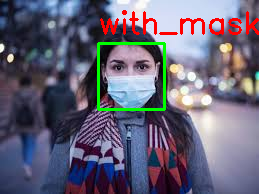

In [85]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from google.colab.patches import cv2_imshow
import numpy as np
categories = ["with_mask","without_mask"]
imge = cv2.imread("/content/test3.jpg")
#faces,con = cv.detect_face(imge)
classifier = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
faces = classifier.detectMultiScale(imge,1.3,5)
print(faces)
for f in faces:
  start_x,start_y = f[0],f[1]
  end_x,end_y = f[2],f[3]
  image = imge[start_y:start_y+end_y,start_x:start_x+end_x]
  print(image)
  img = cv2.resize(image,(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis = 0)
  
  img = preprocess_input(img)
  cv2.rectangle(imge,(start_x,start_y),(start_x+end_x,start_y+end_y),(0,255,0),2)
  
  x = np.argmax(model.predict(img))
  cv2.putText(imge, categories[x], (start_x, start_y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
  print(x)
  print(categories[x])
  
cv2_imshow(imge)




